# Table of Contents
1. [Project Overview](#1-project-overview)  
2. [Dataset Description](#2-dataset-description)  
3. [Data Cleaning & Preprocessing](#3-data-cleaning--preprocessing)  
4. [EDA](#4-exploratory-data-analysis-(EDA))  
5. [Features & Target Engineering](#5-features--target-engineering)  
6. [Model Building](#6-model-building)  
7. [Model Evaluation](#7-model-evaluation)  
8. [Final Step: Probabilities & Conclusion](#8-final-step-probabilities--conclusion)

---
## 1. Project Overview
The main goal of future stars project is to identify and predict potential **“Future Stars”** in football based on player statistics.  
The idea is to use **machine learning models** to analyze performance data and highlight players who have a high potential to excel in the future.  

- **Goal:** Build a model that predicts whether a player can be considered a “Future Star.”  
- **Motivation:** Clubs, scouts, and analysts can use this type of analysis for better talent identification.  
- **Approach:**  
  1. Data cleaning and preprocessing  
  2. Exploratory Data Analysis (EDA)  
  3. Feature engineering and target definition  
  4. Model training and evaluation  
  5. Deployment through an API & Streamlit  

 ---
 ## 2.  Dataset Description
The dataset contains detailed player information and match statistics.  

- **Source:** [Football Players Stats 2024/2025](https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025)  
- **Size:** 2854 players, 165 columns. 

- **Main Features:**  
  - Age, Height, Weight  
  - Position (GK, DF, MF, FW)  
  - Performance stats: Goals, Assists, xG, Tackles, Saves, etc.  
- **Target:** Binary label indicating whether the player is a potential “Future Star” with the probability percentage.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import lightgbm as lgb

In [44]:
df = pd.read_csv("/home/inx_17/code/rahafw/future_stars/data/players_data_light-2024_2025.csv")
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,G+A-PK,xG+xAG,PrgC,PrgP,PrgR,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK_stats_shooting,PKatt_stats_shooting,xG_stats_shooting,npxG_stats_shooting,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Ast_stats_passing,xAG_stats_passing,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP_stats_passing,Live,Dead,FK_stats_passing_types,TB,Sw,Crs,TI,CK,In,Out,Str,Cmp_stats_passing_types,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Att_stats_defense,Tkl%,Lost,Blocks_stats_defense,Sh_stats_defense,Pass,Int,Tkl+Int,Clr,Err,SCA,SCA90,PassLive,PassDead,TO,Sh_stats_gca,Fld,Def,GCA,GCA90,Touches,Def Pen,Def 3rd_stats_possession,Mid 3rd_stats_possession,Att 3rd_stats_possession,Att Pen,Live_stats_possession,Att_stats_possession,Succ,Succ%,Tkld,Tkld%,Carries,TotDist_stats_possession,PrgDist_stats_possession,PrgC_stats_possession,1/3_stats_possession,CPA,Mis,Dis,Rec,PrgR_stats_possession,CrdY_stats_misc,CrdR_stats_misc,2CrdY,Fls,Fld_stats_misc,Off_stats_misc,Crs_stats_misc,Int_stats_misc,TklW_stats_misc,PKwon,PKcon,OG,Recov,Won,Lost_stats_misc,Won%,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt_stats_keeper,PKA,PKsv,PKm,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp_stats_keeper_adv,Att_stats_keeper_adv,Cmp%_stats_keeper_adv,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,8,3,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,50,63,79.4,887,361,0,0.0,0.0,0.0,0,8,0,0,8,51,12,2,0,0,2,10,0,0,0,0,50,2,2,1,1,0,1,100.0,0,3,1,2,1,3,0,0,2,2.09,2,0,0,0,0,0,0,0.0,73,2,19,40,15,0,73,2,0,0.0,1,50.0,41,152,68,1,0,0,1,0,40,3,0,0,0,0,2,0,2,1,2,0,0,0,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.02,0,6,10,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,47,66,71.2,705,190,0,0.0,0.0,0.0,1,2,0,0,6,54,12,1,0,0,5,11,0,0,0,0,47,4,4,2,2,0,5,80.0,1,1,0,1,0,4,3,0,1,0.75,1,0,0,0,0,0,0,0.0,85,1,21,28,36,0,85,4,1,25.0,2,50.0,46,215,103,0,3,0,3,1,49,10,2,0,0,0,2,0,5,0,4,0,0,0,7,2,1,66.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.10,3,2,3,1,0,0.0,1.38,0.0,0.0,NaN,24.5,0,0,0,0.1,0.1,0.07,-0.1,-0.1,17,29,58.6,268,110,0,0.0,0.0,0.0,0,0,0,0,2,21,8,0,0,0,1,8,0,0,0,0,17,3,2,2,1,0,3,100.0,0,1,0,1,1,4,0,0,0,0.00,0,0,0,0,0,0,0,0.0,36,1,8,19,9,1,36,1,1,100.0,0,0.0,13,101,67,3,2,1,0,2,16,3,1,0,0,2,0,1,1,1,2,0,0,0,2,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,0.0,0.06,3,4,1,1,0,0.0,1.02,0.0,0.0,NaN,15.0,0,0,0,0.1,0.1,0.06,-0.1,-0.1,36,46,78.3,614,206,0,0.0,0.0,0.0,0,2,0,0,4,45,1,1,0,0,0,0,0,0,0,0,36,4,2,4,0,0,3,66.7,1,2,1,1,1,5,3,0,1,1.02,1,0,0,0,0,0,0,0.0,65,8,37,22,7,2,65,0,0,NaN,0,NaN,29,219,165,3,1,1,1,3,34,1,1,0,0,4,3,0,0,1,2,0,0,0,7,2,2,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,0,NaN,0.00,0.0,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,2,2,100.0,41,0,0,0.0,0.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,1,100.0,0,0,0,0,0,1,0,0,0,0.00,0,0,0,0,0,0,0,0.0,4,0,3,1,0,0,4,0,0,NaN,0,NaN,1,10,9,1,0,0,1,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(2854, 165)

In [46]:
selected_columns = [
    # Player info
    "Player", "Nation", "Pos", "Age",

    # Playing time
    "MP", "Starts", "Min", "90s",

    # Attacking
    "Gls", "Ast", "xG", "xAG", "G+A",

    # Defensive
    "Tkl", "TklW", "Blocks_stats_defense", "Clr", "Err",

    # Passing & Creativity Stats
    "PrgP", "PrgC", "KP", "xA",

    # Goalkeeping
    "GA", "Saves", "Save%", "CS", "CS%", "PKA", "PKsv",

    # Miscellaneous Stats
    "CrdY", "CrdR"
]

filtered_df = df[selected_columns].copy()

print(" filtered dataframe shape:", filtered_df.shape)

# Display all the columns
pd.set_option("display.max_columns", None)
filtered_df.head()

 filtered dataframe shape: (2854, 31)


,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR
0,Max Aarons,eng ENG,DF,24.0,3,1,86,1.0,0,0,0.0,0.0,0,2,2,3,0,0,8,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,Max Aarons,eng ENG,"DF,MF",24.0,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,Rodrigo Abajas,es ESP,DF,21.0,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,James Abankwah,ie IRL,"DF,MF",20.0,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Keyliane Abdallah,fr FRA,FW,18.0,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [47]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player                2854 non-null   object 
 1   Nation                2847 non-null   object 
 2   Pos                   2854 non-null   object 
 3   Age                   2846 non-null   float64
 4   MP                    2854 non-null   int64  
 5   Starts                2854 non-null   int64  
 6   Min                   2854 non-null   int64  
 7   90s                   2854 non-null   float64
 8   Gls                   2854 non-null   int64  
 9   Ast                   2854 non-null   int64  
 10  xG                    2854 non-null   float64
 11  xAG                   2854 non-null   float64
 12  G+A                   2854 non-null   int64  
 13  Tkl                   2854 non-null   int64  
 14  TklW                  2854 non-null   int64  
 15  Blocks_stats_defense 

---
## 3. Data Cleaning & Preprocessing

In [48]:
# Check for missing data
missing_data = filtered_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(30)

CS%                     92.89%
Save%                   92.78%
PKsv                    92.57%
Saves                   92.57%
GA                      92.57%
PKA                     92.57%
CS                      92.57%
Age                      0.28%
Nation                   0.25%
90s                       0.0%
Player                    0.0%
Pos                       0.0%
MP                        0.0%
Starts                    0.0%
Min                       0.0%
TklW                      0.0%
Tkl                       0.0%
G+A                       0.0%
xAG                       0.0%
xG                        0.0%
Ast                       0.0%
Gls                       0.0%
Blocks_stats_defense      0.0%
xA                        0.0%
KP                        0.0%
PrgC                      0.0%
PrgP                      0.0%
Clr                       0.0%
Err                       0.0%
CrdY                      0.0%
dtype: object

In [49]:
print("Unique positions:", filtered_df["Pos"].unique())
print("Unique nations:", filtered_df["Nation"].nunique())
filtered_df["Nation"].value_counts().head(10)

Unique positions: ['DF' 'DF,MF' 'FW' 'MF,FW' 'MF' 'FW,MF' 'GK' 'FW,DF' 'DF,FW' 'MF,DF']
Unique nations: 113


Nation
es ESP     415
fr FRA     346
de GER     232
it ITA     227
eng ENG    224
br BRA      89
ar ARG      77
pt POR      64
nl NED      62
dk DEN      56
Name: count, dtype: int64

## Some Players with 2 postions 

In [50]:
# Select the position where each player played the most minutes
main_df = (
    filtered_df.sort_values("Min", ascending=False)
    .drop_duplicates(subset="Player")
    .sort_index()
)

# Check result
main_df[["Player", "Pos", "Min"]].head(10)

,Player,Pos,Min
1,Max Aarons,"DF,MF",120
2,Rodrigo Abajas,DF,65
3,James Abankwah,"DF,MF",88
4,Keyliane Abdallah,FW,3
5,Yunis Abdelhamid,DF,1033
6,Himad Abdelli,"MF,FW",2842
7,Mohamed Abdelmoneim,DF,855
8,Ali Abdi,"DF,MF",1393
9,Saud Abdulhamid,DF,205
10,Abel,DF,2074


In [51]:
# Count missing values in Age column
missing_counts = main_df["Age"].isna().sum()
print(missing_counts)

8


In [52]:
#Fill missing values in Age column with median age
main_df['Age'] = main_df['Age'].fillna(main_df['Age'].median()).astype(int)

print("\nAfter filling Age with median")
print("-----------------------------")
print(main_df[['Player','Age']].head(10))


After filling Age with median
-----------------------------
                 Player  Age
1            Max Aarons   24
2        Rodrigo Abajas   21
3        James Abankwah   20
4     Keyliane Abdallah   18
5      Yunis Abdelhamid   36
6         Himad Abdelli   24
7   Mohamed Abdelmoneim   25
8              Ali Abdi   30
9       Saud Abdulhamid   25
10                 Abel   23


In [53]:
# Replace NaN with the string "Null" only in goalkeepers columns
goalkeepers_cols = ['CS%', 'Save%', 'PKsv', 'Saves', 'GA', 'PKA', 'CS']

main_df[goalkeepers_cols] = main_df[goalkeepers_cols].fillna("Null")

print("After replacing NaN with 'Null' for goalkeepers columns")
print("-------------------------------------------------------")
print(main_df[goalkeepers_cols].head())

After replacing NaN with 'Null' for goalkeepers columns
-------------------------------------------------------
    CS% Save%  PKsv Saves    GA   PKA    CS
1  Null  Null  Null  Null  Null  Null  Null
2  Null  Null  Null  Null  Null  Null  Null
3  Null  Null  Null  Null  Null  Null  Null
4  Null  Null  Null  Null  Null  Null  Null
5  Null  Null  Null  Null  Null  Null  Null


In [54]:
# Count missing Nation values
missing_nation_count = main_df['Nation'].isna().sum()
print("Number of missing Nation values:", missing_nation_count)

Number of missing Nation values: 7


In [55]:
#pycountry does not write nation name correctly
main_df["Nation"] = filtered_df["Nation"].str.split().str[-1]

def full_country_name(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code

main_df["Nation"] = main_df["Nation"].apply(full_country_name)
print(main_df[["Player", "Nation"]].head(20))

                 Player   Nation
1            Max Aarons      ENG
2        Rodrigo Abajas    Spain
3        James Abankwah  Ireland
4     Keyliane Abdallah   France
5      Yunis Abdelhamid  Morocco
6         Himad Abdelli      ALG
7   Mohamed Abdelmoneim    Egypt
8              Ali Abdi  Tunisia
9       Saud Abdulhamid      KSA
10                 Abel    Spain
11        Nabil Aberdin   France
12    Oliver Abildgaard      DEN
13       Matthis Abline   France
14                Abner   Brazil
15    Zakaria Aboukhlal  Morocco
16          Abdel Abqar  Morocco
18        Tammy Abraham      ENG
19   Federico Accornero    Italy
20     Francesco Acerbi    Italy
21    Joshua Acheampong      ENG


### Not all countries appears on full name

the dataset uses **FIFA codes**, not standard **ISO codes**  
- Examples: KSA (Saudi Arabia) 
- pycountry only knows **ISO codes** like SAU  for Saudi Arabis 

That’s why some countries stayed as codes and didn’t convert to full names

In [56]:
# Manual mapping for Nation codes that pycountry does not handle correctly
custom_map = {
    'KSA':'Saudi Arabia', 'SCO':'Scotland', 'WAL':'Wales', 'NIR':'Northern Ireland',
    'ENG':'England', 'ALG':'Algeria', 'DEN':'Denmark', 'IRL':'Ireland',
    'CIV':"Côte d'Ivoire", 'RSA':'South Africa', 'TUR':'Turkey', 'UAE':'United Arab Emirates',
    'SUI':'Switzerland', 'CZE':'Czech Republic', 'KOR':'South Korea', 'NED':'Netherlands',
    'POR':'Portugal', 'SRB':'Serbia', 'SVK':'Slovakia', 'USA':'United States',
    'GER':'Germany', 'FRA':'France', 'ESP':'Spain', 'ITA':'Italy', 'BRA':'Brazil',
    'ARG':'Argentina', 'MEX':'Mexico', 'JPN':'Japan', 'COL':'Colombia', 'URU':'Uruguay',
    'BEL':'Belgium', 'CRO':'Croatia', 'MAR':'Morocco', 'GHA':'Ghana', 'NGA':'Nigeria',
    'TUN':'Tunisia', 'EGY':'Egypt', 'CMR':'Cameroon', 'IRN':'Iran', 'AUS':'Australia',
    'CAN':'Canada', 'BIH':'Bosnia and Herzegovina', 'SVN':'Slovenia', 'ROU':'Romania',
    'BUL':'Bulgaria', 'HUN':'Hungary', 'FIN':'Finland', 'ISL':'Iceland', 'NOR':'Norway',
    'LTU':'Lithuania', 'LAT':'Latvia', 'EST':'Estonia', 'ALB':'Albania', 'MKD':'North Macedonia',
    'AND':'Andorra', 'LUX':'Luxembourg', 'KVX':'Kosovo', 'GRE':'Greece', 'TOG':'Togo',
    'HAI':'Haiti', 'PAR':'Paraguay', 'GUI':'Guinea', 'GAM':'Gambia', 'CTA':'Catalonia',
    'PUR':'Puerto Rico', 'CHI':'Chile', 'MAD':'Madagascar', 'ZIM':'Zimbabwe', 'MAS':'Malaysia',
    'EQG':'Equatorial Guinea', 'ANG':'Angola', 'ZAM':'Zambia', 'PHI':'Philippines',
    'BAN':'Bangladesh', 'CGO':'Congo', 'CRC':'Costa Rica'
}
main_df["Nation"] = main_df["Nation"].replace(custom_map)
print("After replacing custom Nation codes")
print("-----------------------------------")
print(main_df["Nation"].head(20))

After replacing custom Nation codes
-----------------------------------
1          England
2            Spain
3          Ireland
4           France
5          Morocco
6          Algeria
7            Egypt
8          Tunisia
9     Saudi Arabia
10           Spain
11          France
12         Denmark
13          France
14          Brazil
15         Morocco
16         Morocco
18         England
19           Italy
20           Italy
21         England
Name: Nation, dtype: object


In [57]:
# Handling missing values in Nation
# Since there is only 7 players with missing Nation we fill them with the real value
manual_nations = {
    "Olabade Aluko": "England",
    "Jake Evans": "England",
    "Atakan Karazor": "Germany",
    "Fer López": "Spain",
    "Mateus Mane": "England",
    "Jeremy Monga": "England",
    "Plamedi Nsingi": "Congo"
}

# Fill Nation column for these players
for player, country in manual_nations.items():
    main_df.loc[main_df['Player'] == player, 'Nation'] = country

print(main_df[main_df['Player'].isin(manual_nations.keys())][['Player', 'Nation']])

              Player   Nation
100    Olabade Aluko  England
862       Jake Evans  England
1320  Atakan Karazor  Germany
1518       Fer López    Spain
1603     Mateus Mane  England
1778    Jeremy Monga  England
1917  Plamedi Nsingi    Congo


In [58]:
# Check for any missing values after cleaning the data
missing_data = main_df.isna().mean().mul(100).round(2).sort_values(ascending=False).astype(str) + '%'
missing_data.head(31)

Player                  0.0%
Nation                  0.0%
Pos                     0.0%
Age                     0.0%
MP                      0.0%
Starts                  0.0%
Min                     0.0%
90s                     0.0%
Gls                     0.0%
Ast                     0.0%
xG                      0.0%
xAG                     0.0%
G+A                     0.0%
Tkl                     0.0%
TklW                    0.0%
Blocks_stats_defense    0.0%
Clr                     0.0%
Err                     0.0%
PrgP                    0.0%
PrgC                    0.0%
KP                      0.0%
xA                      0.0%
GA                      0.0%
Saves                   0.0%
Save%                   0.0%
CS                      0.0%
CS%                     0.0%
PKA                     0.0%
PKsv                    0.0%
CrdY                    0.0%
CrdR                    0.0%
dtype: object

---
## 4. Exploratory Data Analysis (EDA)

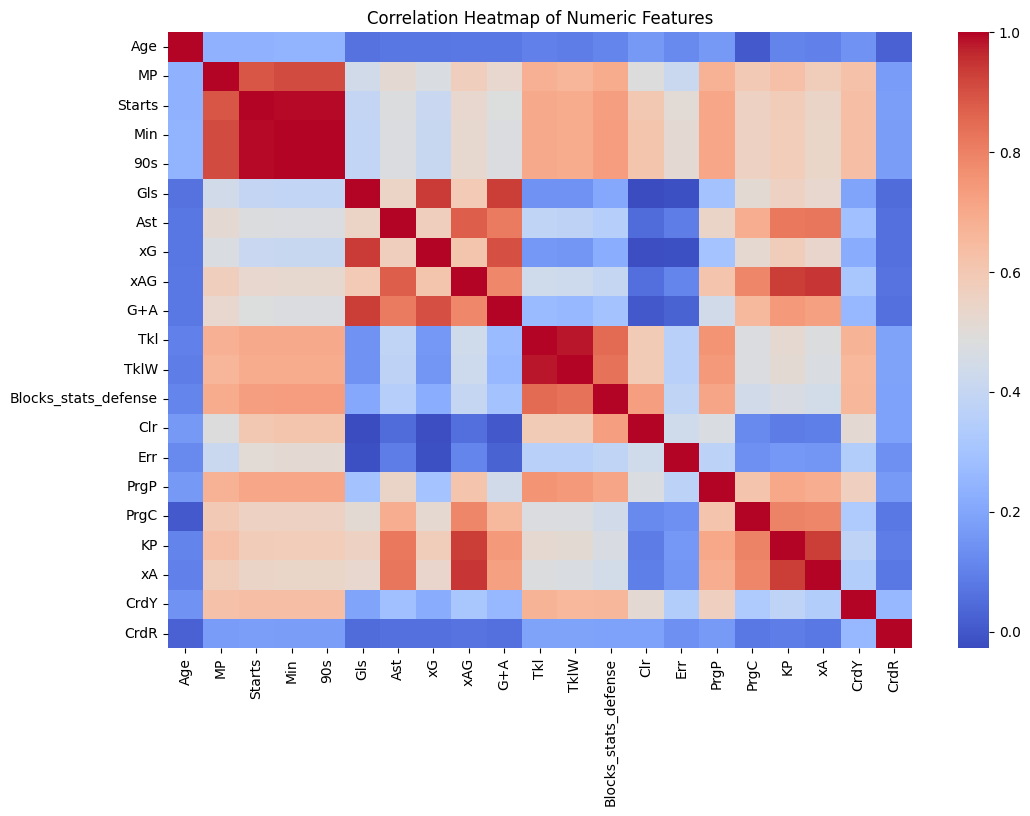

In [59]:
dc = main_df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(12,8))
sns.heatmap(dc.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Correlation Insights

From the correlation heatmap, I observed several **strong correlations**:

- **Playing time metrics**:  
  - MP, Starts, Min, and 90s are highly correlated.  
  - It make sence because more matches, more starts, more minutes, more full games.  

- **Attacking metrics**:  
  - Gls and xG show strong positive correlation (players with high expected goals usually score more).  
  - Ast correlates strongly with xAG and xA.  

- **Defensive metrics**:  
  - Tkl and TklW are highly correlated (players who attempt more tackles usually win more).    

- **Goalkeeping metrics**:  
  - GA (goals conceded) is negatively correlated with Save%, CS, CS%, and PKsv.  
  - This means that better goalkeepers are conceding fewer goals and has more clean sheets.  

- **Other features**:  
  - CrdY, CrdR don’t strongly correlate with most other features, so they are independent information.  

---

### Decision
This is the **EDA phase**, I will **not drop any columns yet**.  
For **modeling later**, we may drop or merge some of these highly correlated features to reduce redundancy.


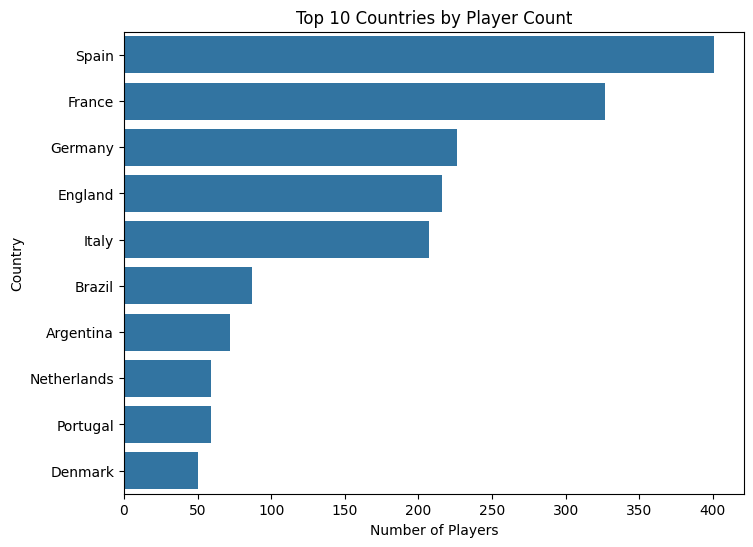

In [60]:
# This is important for our project, because scouts needs to know which country has the most players
top_nations = main_df["Nation"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_nations.values, y=top_nations.index)
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()

# Explore Players Contribution

In [61]:
df_contrib = main_df.copy()

# Convert data into per 90 min so we have a fair coparison
df_contrib["Goals_per90"] = (df_contrib["Gls"] / df_contrib["Min"]) * 90
df_contrib["Assists_per90"] = (df_contrib["Ast"] / df_contrib["Min"]) * 90
df_contrib["GA_per90"] = (df_contrib["G+A"] / df_contrib["Min"]) * 90


# Top 10 in each feature
top_goals = df_contrib.sort_values("Goals_per90", ascending=False).head(10)
top_assists = df_contrib.sort_values("Assists_per90", ascending=False).head(10)
top_ga = df_contrib.sort_values("GA_per90", ascending=False).head(10)

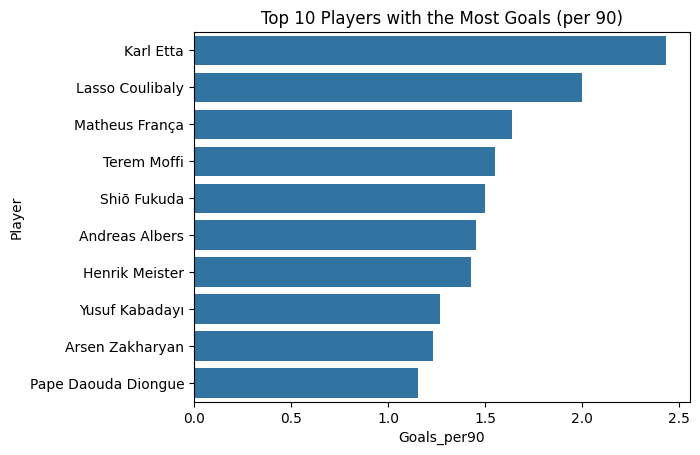

In [62]:
sns.barplot(x="Goals_per90", y="Player", data=top_goals)
plt.title("Top 10 Players with the Most Goals (per 90)")
plt.show()

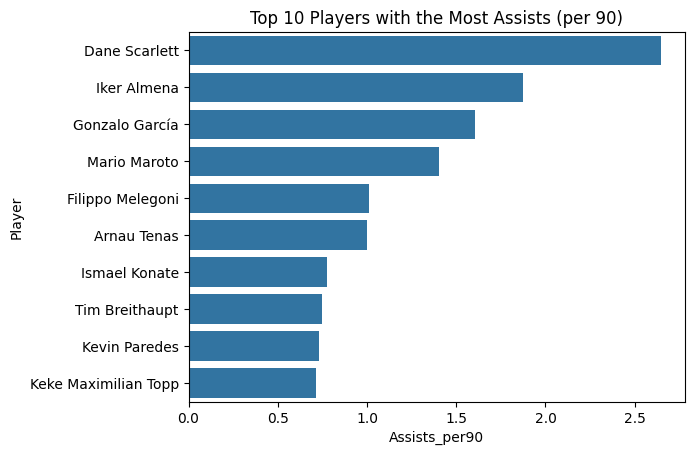

In [63]:
sns.barplot(x="Assists_per90", y="Player", data=top_assists)
plt.title("Top 10 Players with the Most Assists (per 90)")
plt.show()

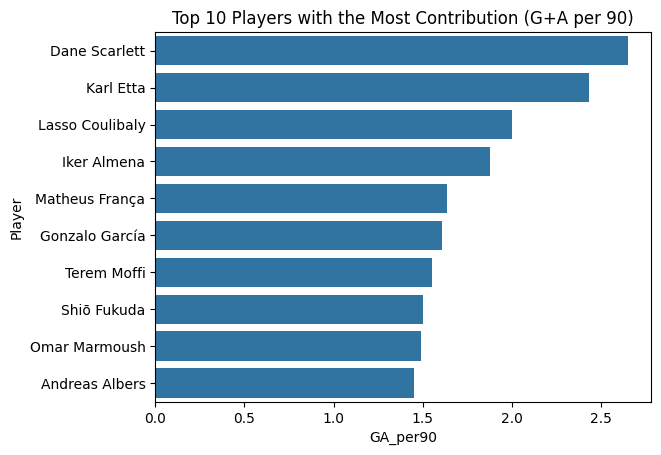

In [64]:
sns.barplot(x="GA_per90", y="Player", data=top_ga)
plt.title("Top 10 Players with the Most Contribution (G+A per 90)")
plt.show()

---
## 5. Features & Target Engineering 

- Use per-90 min stats so minutes don’t bias the results.

- Label top performers in each position group as “future star = 1”, others “= 0”.

- Later, ML model will output score percentage.

In [65]:
target_df = main_df.copy()

In [66]:
# Contributions per 90 minutes
target_df["GA_per90"] = (target_df["G+A"] / target_df["Min"]) * 90
target_df["xGA_per90"] = ((target_df["xG"] + target_df["xAG"]) / target_df["Min"]) * 90

# Defensive actions per 90
target_df["Def_Actions_per90"] = ((target_df["Tkl"] + target_df["Blocks_stats_defense"] + target_df["Clr"]) / target_df["Min"]) * 90

# Progressive passing per 90
target_df["ProgPass_per90"] = (target_df["PrgP"] / target_df["Min"]) * 90

In [67]:
# Mapping multiple position for one only

def map_role(pos):
    if "GK" in pos:
        return "GK"
    elif "FW" in pos:
        return "FW"
    elif "MF" in pos:
        return "MF"
    elif "DF" in pos:
        return "DF"
    else:
        return "Other"

target_df["Role"] = target_df["Pos"].apply(map_role)

In [68]:
# Future Star Score

def star_score(row):
    if row["Role"] == "FW":
        return row["GA_per90"]

    elif row["Role"] == "MF":
        return (0.6 * row["xGA_per90"]) + (0.4 * row["ProgPass_per90"])

    elif row["Role"] == "DF":
        return row["Def_Actions_per90"]

    elif row["Role"] == "GK":
        try:
            return float(row["Save%"])
        except:
            return 0  # if it's null or invalid
    else:
        return 0

target_df["Star_Score"] = target_df.apply(star_score, axis=1)

In [69]:
# Find top 20% in each position

POS_TOP_PCT = 0.80
role_thresholds = target_df.groupby("Role")["Star_Score"].quantile(POS_TOP_PCT).rename("role_threshold")

target_df = target_df.merge(role_thresholds, left_on="Role", right_index=True, how="left")

target_df["Future_Star"] = (target_df["Star_Score"] >= target_df["role_threshold"]).astype(int)

In [122]:
target_df["Future_Star"].value_counts()

Future_Star
0    2160
1     542
Name: count, dtype: int64

In [70]:
# Testing

print(target_df.groupby("Role")["Future_Star"].mean())
print(target_df["Future_Star"].value_counts())

Role
DF    0.200000
FW    0.200640
GK    0.201923
MF    0.200809
Name: Future_Star, dtype: float64
Future_Star
0    2160
1     542
Name: count, dtype: int64


In [71]:
target_df.head(10)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,xG,xAG,G+A,Tkl,TklW,Blocks_stats_defense,Clr,Err,PrgP,PrgC,KP,xA,GA,Saves,Save%,CS,CS%,PKA,PKsv,CrdY,CrdR,GA_per90,xGA_per90,Def_Actions_per90,ProgPass_per90,Role,Star_Score,role_threshold,Future_Star
1,Max Aarons,England,"DF,MF",24,4,1,120,1.3,0,0,0.0,0.0,0,4,4,1,3,0,6,0,1,0.0,Null,Null,Null,Null,Null,Null,Null,2,0,0.000000,0.000000,6.000000,4.500000,MF,1.800000,2.469161,0
2,Rodrigo Abajas,Spain,DF,21,1,1,65,0.7,0,0,0.1,0.0,0,3,2,1,0,0,2,3,0,0.0,Null,Null,Null,Null,Null,Null,Null,1,0,0.000000,0.138462,5.538462,2.769231,DF,5.538462,8.742007,0
3,James Abankwah,Ireland,"DF,MF",20,6,0,88,1.0,0,0,0.1,0.0,0,4,2,2,3,0,4,3,0,0.0,Null,Null,Null,Null,Null,Null,Null,1,0,0.000000,0.102273,9.204545,4.090909,MF,1.697727,2.469161,0
4,Keyliane Abdallah,France,FW,18,1,0,3,0.0,0,0,0.0,0.0,0,1,1,0,0,0,0,1,0,0.0,Null,Null,Null,Null,Null,Null,Null,0,0,0.000000,0.000000,30.000000,0.000000,FW,0.000000,0.577973,0
5,Yunis Abdelhamid,Morocco,DF,36,16,11,1033,11.5,0,0,0.2,0.1,0,17,11,26,57,1,22,4,2,0.3,Null,Null,Null,Null,Null,Null,Null,2,0,0.000000,0.026137,8.712488,1.916747,DF,8.712488,8.742007,0
6,Himad Abdelli,Algeria,"MF,FW",24,32,32,2842,31.6,6,1,6.4,3.2,7,48,32,24,28,2,207,107,39,3.7,Null,Null,Null,Null,Null,Null,Null,4,0,0.221675,0.304011,3.166784,6.555243,FW,0.221675,0.577973,0
7,Mohamed Abdelmoneim,Egypt,DF,25,12,10,855,9.5,0,0,0.0,0.0,0,21,14,11,56,1,52,6,0,0.2,Null,Null,Null,Null,Null,Null,Null,2,0,0.000000,0.000000,9.263158,5.473684,DF,9.263158,8.742007,1
8,Ali Abdi,Tunisia,"DF,MF",30,25,17,1393,15.5,5,2,4.3,1.9,7,43,25,20,37,0,42,35,20,1.7,Null,Null,Null,Null,Null,Null,Null,2,0,0.452261,0.400574,6.460876,2.713568,MF,1.325772,2.469161,0
9,Saud Abdulhamid,Saudi Arabia,DF,25,4,2,205,2.3,0,1,0.0,0.2,1,3,2,2,0,0,9,6,2,0.2,Null,Null,Null,Null,Null,Null,Null,0,0,0.439024,0.087805,2.195122,3.951220,DF,2.195122,8.742007,0
10,Abel,Spain,DF,23,35,20,2074,23.0,2,0,0.5,1.0,2,61,37,29,64,2,77,50,16,1.5,Null,Null,Null,Null,Null,Null,Null,3,0,0.086789,0.065092,6.682739,3.341369,DF,6.682739,8.742007,0


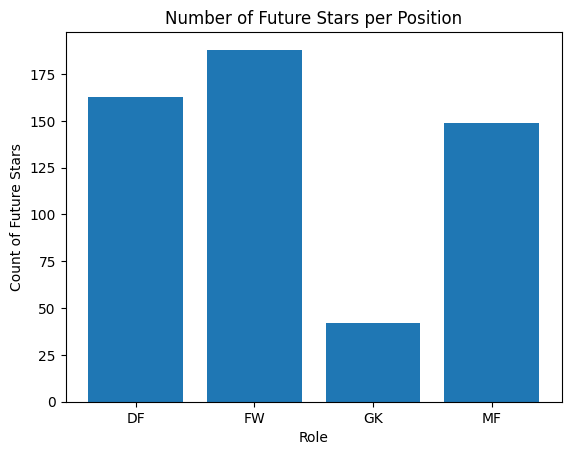

In [72]:
star_counts = target_df.groupby("Role")["Future_Star"].sum()

plt.bar(star_counts.index, star_counts.values)
plt.title("Number of Future Stars per Position")
plt.xlabel("Role")
plt.ylabel("Count of Future Stars")
plt.show()

---
## 6. Model Building
We tested different machine learning models to classify players as **Future Stars** or not.  
The models included:

- **Random Forest** → A strong baseline, stable and interpretable.  
- **XGBoost** → Gradient boosting model, effective for imbalanced data.  
- **LightGBM** → Lightweight boosting model, very fast and efficient.  

Each model was trained on the processed dataset using an 80/20 train-test split.  
Hyperparameters were tuned to balance **accuracy**, **F1 score**, and **recall**, for identifying more true “Future Stars” is crucial.  

In [73]:
# Prepare data
drop_cols = ["Player", "Nation", "Star_Score", "role_threshold"]
X = target_df.drop(columns=drop_cols)
y = target_df["Future_Star"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).drop(columns=["Future_Star"]).columns.tolist()
categorical_features = ["Role"]

# Imputes missing values for numeric (Age) + one-hot encodes categorical (Position)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test, threshold=0.8):
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)

    # Predicted probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n=== {name} (threshold={threshold}) ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.4f}")
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print(f"PR-AUC   : {auc(rec, prec):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))

## **Random Forest**

In [111]:
print("--- Random Forest ---")

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test, threshold=0.8)

--- Random Forest ---

=== Random Forest (threshold=0.8) ===
Confusion Matrix:
 [[432   0]
 [ 41  68]]
Accuracy : 0.9242
Precision: 1.0000
Recall   : 0.6239
F1 Score : 0.7684
ROC-AUC  : 0.9844
PR-AUC   : 0.9684

Classification Report:
              precision    recall  f1-score   support

           0      0.913     1.000     0.955       432
           1      1.000     0.624     0.768       109

    accuracy                          0.924       541
   macro avg      0.957     0.812     0.862       541
weighted avg      0.931     0.924     0.917       541



## **XGBoost**

In [118]:
print("--- XGBoost ---")

# Adjust weight to handle class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

evaluate_model("XGBoost", xgb_clf, X_train, y_train, X_test, y_test, threshold=0.80)

--- XGBoost ---

=== XGBoost (threshold=0.8) ===
Confusion Matrix:
 [[426   6]
 [  8 101]]
Accuracy : 0.9741
Precision: 0.9439
Recall   : 0.9266
F1 Score : 0.9352
ROC-AUC  : 0.9932
PR-AUC   : 0.9803

Classification Report:
              precision    recall  f1-score   support

           0      0.982     0.986     0.984       432
           1      0.944     0.927     0.935       109

    accuracy                          0.974       541
   macro avg      0.963     0.956     0.960       541
weighted avg      0.974     0.974     0.974       541



In [76]:
# Evaluate on training set too (for overfitting check)
# Fit pipeline with preprocessing and model
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_clf)
])
pipeline.fit(X_train, y_train)

# Evaluate overfitting
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")


Train Accuracy: 0.9981
Test Accuracy : 0.9593


In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

print("--- Tuning XGBoost ---")

# Class imbalance adjustment
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Base model
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

# Pipeline
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_base)
])

# Parameter grid (prefixed with model__)
param_dist = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 4, 5, 6, 8],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.01, 0.1, 1],
    "model__reg_lambda": [0.1, 1, 5, 10],
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


--- Tuning XGBoost ---


In [80]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

def compare_models_roc_pr(models, X_test, y_test):
    """
    Compare multiple models (pipelines) by overlaying their ROC & PR curves.
    models = dict with format {'ModelName': trained_pipeline}
    """
    plt.figure(figsize=(12,5))

    # ===== ROC CURVE =====
    plt.subplot(1,2,1)
    for name, pipeline in models.items():
        y_proba = pipeline.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'k--',alpha=0.6)
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()

    # ===== PRECISION–RECALL CURVE =====
    plt.subplot(1,2,2)
    for name, pipeline in models.items():
        y_proba = pipeline.predict_proba(X_test)[:,1]
        prec, rec, _ = precision_recall_curve(y_test, y_proba)
        pr_auc = auc(rec, prec)
        plt.plot(rec, prec, label=f"{name} (PR AUC={pr_auc:.3f})")
    plt.title("Precision–Recall Curve Comparison")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [85]:
# Fit tuning
random_search.fit(X_train, y_train)

print("\n✅ Best Parameters:")
for k, v in random_search.best_params_.items():
    print(f"   {k}: {v}")
print(f"\n✅ Best Mean ROC-AUC (CV): {random_search.best_score_:.4f}")

# Best tuned model
best_xgb = random_search.best_estimator_.named_steps["model"]

# --- Evaluation on Test Set ---
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", best_xgb)
])
pipeline.fit(X_train, y_train)

# Predictions
y_proba = pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.8).astype(int)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=100, model__reg_alpha=0.01, model__reg_lambda=0.1, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=100, model__reg_alpha=0.01, model__reg_lambda=0.1, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=100, model__reg_alpha=0.01, model__reg_lambda=0.1, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=100, model__reg_alpha=0.01, model__reg_lambda=0.1, model__subsample=1.0; total time=   0.1s
[CV] END model__colsample_bytree=0.8, model__learning_rate=0.05, model__max_depth=6, model__n_estimators=100, model__reg_alpha=0.01, model__reg_lambda

In [86]:
# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n=== 🧠 XGBoost Tuned Model Performance (Threshold=0.8) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")


=== 🧠 XGBoost Tuned Model Performance (Threshold=0.8) ===
Accuracy : 0.9797
Precision: 1.0000
Recall   : 0.8991
F1 Score : 0.9469
ROC-AUC  : 0.9929


# Tuned-XGBoost

In [120]:
print("--- Tuned-XGBoost ---")

# Adjust weight to handle class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=1.0,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight
)

evaluate_model("XGBoost", xgb_clf, X_train, y_train, X_test, y_test, threshold=0.80)

--- Tuned-XGBoost ---

=== XGBoost (threshold=0.8) ===
Confusion Matrix:
 [[432   0]
 [ 10  99]]
Accuracy : 0.9815
Precision: 1.0000
Recall   : 0.9083
F1 Score : 0.9519
ROC-AUC  : 0.9937
PR-AUC   : 0.9815

Classification Report:
              precision    recall  f1-score   support

           0      0.977     1.000     0.989       432
           1      1.000     0.908     0.952       109

    accuracy                          0.982       541
   macro avg      0.989     0.954     0.970       541
weighted avg      0.982     0.982     0.981       541



## After using somte

In [129]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Step 1: SMOTE
smote = SMOTE(random_state=42)

# Step 2: Define model
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=1.0,
    colsample_bytree=0.6,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Step 3: Combine into pipeline
xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_clf)
])

# Step 4: Fit pipeline
xgb_smote_pipe.fit(X_train, y_train)

# Step 5: Evaluate using the pipeline itself
evaluate_model("XGBoost + SMOTE", xgb_smote_pipe, X_train, y_train, X_test, y_test, threshold=0.8)


=== XGBoost + SMOTE (threshold=0.8) ===
Confusion Matrix:
 [[432   0]
 [ 12  97]]
Accuracy : 0.9778
Precision: 1.0000
Recall   : 0.8899
F1 Score : 0.9417
ROC-AUC  : 0.9938
PR-AUC   : 0.9808

Classification Report:
              precision    recall  f1-score   support

           0      0.973     1.000     0.986       432
           1      1.000     0.890     0.942       109

    accuracy                          0.978       541
   macro avg      0.986     0.945     0.964       541
weighted avg      0.978     0.978     0.977       541



In [128]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test, threshold=0.8):
    # If model is already a pipeline (has 'predict_proba' directly)
    if hasattr(model, "predict_proba") and not hasattr(model, "steps"):
        pipeline = Pipeline([
            ("preprocess", preprocessor),
            ("model", model)
        ])
    else:
        pipeline = model  # it's already a full pipeline (e.g., includes SMOTE + preprocess)

    pipeline.fit(X_train, y_train)

    # Predicted probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n=== {name} (threshold={threshold}) ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_proba):.4f}")
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    print(f"PR-AUC   : {auc(rec, prec):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))


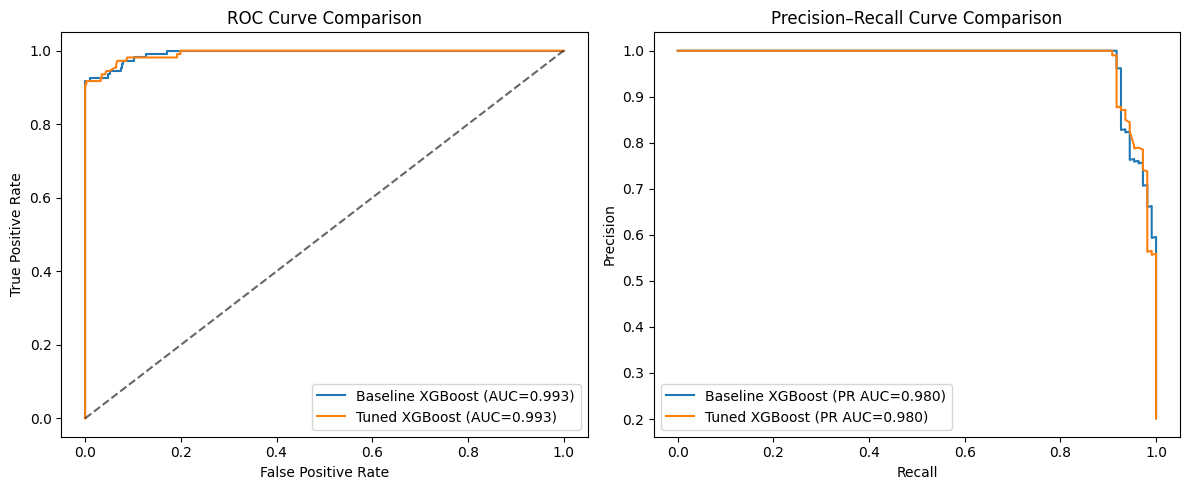

In [88]:
# Wrap your models inside the preprocessing pipeline
baseline_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_clf)
])

tuned_pipe = random_search.best_estimator_  # already includes preprocessor

# Now compare both
compare_models_roc_pr(
    {"Baseline XGBoost": baseline_pipe, "Tuned XGBoost": tuned_pipe},
    X_test, y_test
)


In [89]:
y_train_proba = pipeline.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_train_proba)
print(f"Train ROC-AUC: {train_auc:.4f}")


Train ROC-AUC: 0.9981


In [90]:
# Evaluate on training set too (for overfitting check)
# Fit pipeline with preprocessing and model
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_clf)
])
pipeline.fit(X_train, y_train)

# Evaluate overfitting
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy : {accuracy_score(y_test, y_test_pred):.4f}")


Train Accuracy: 0.9981
Test Accuracy : 0.9593


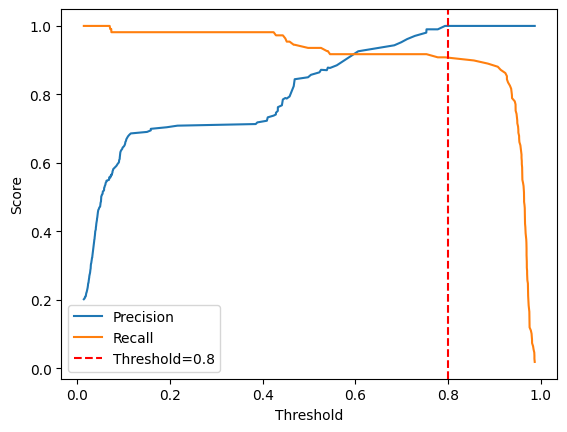

In [91]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

prec, rec, thr = precision_recall_curve(y_test, y_proba)
plt.plot(thr, prec[:-1], label="Precision")
plt.plot(thr, rec[:-1], label="Recall")
plt.axvline(0.8, color="r", ls="--", label="Threshold=0.8")
plt.xlabel("Threshold"); plt.ylabel("Score"); plt.legend(); plt.show()


In [92]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Get model probabilities for the test set
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

# Find the threshold that maximizes F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔹 Best Threshold: {best_threshold:.3f}")
print(f"🔹 Max F1 Score  : {best_f1:.4f}")
print(f"🔹 Precision @ best: {precisions[best_idx]:.4f}")
print(f"🔹 Recall @ best   : {recalls[best_idx]:.4f}")


🔹 Best Threshold: 0.911
🔹 Max F1 Score  : 0.9569
🔹 Precision @ best: 1.0000
🔹 Recall @ best   : 0.9174


In [109]:
best_threshold = 0.87  # ensure it's a Python float

y_pred_best = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(f"=== Tuned XGBoost (optimal threshold = {best_threshold:.2f}) ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, digits=3))


=== Tuned XGBoost (optimal threshold = 0.87) ===
Confusion Matrix:
 [[430   2]
 [  9 100]]
              precision    recall  f1-score   support

           0      0.979     0.995     0.987       432
           1      0.980     0.917     0.948       109

    accuracy                          0.980       541
   macro avg      0.980     0.956     0.968       541
weighted avg      0.980     0.980     0.979       541



## **LightGBM**

In [77]:
print("--- LightGBM ---")

lgbm_clf = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

evaluate_model("LightGBM", lgbm_clf, X_train, y_train, X_test, y_test, threshold=0.8)

--- LightGBM ---

=== LightGBM (threshold=0.8) ===
Confusion Matrix:
 [[424   8]
 [  9 100]]
Accuracy : 0.9686
Precision: 0.9259
Recall   : 0.9174
F1 Score : 0.9217
ROC-AUC  : 0.9884
PR-AUC   : 0.9722

Classification Report:
              precision    recall  f1-score   support

           0      0.979     0.981     0.980       432
           1      0.926     0.917     0.922       109

    accuracy                          0.969       541
   macro avg      0.953     0.949     0.951       541
weighted avg      0.968     0.969     0.969       541



/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [78]:
from sklearn.ensemble import VotingClassifier

# ✅ Final optimized ensemble
final_ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', pipeline_xgb.named_steps['model']),
        ('lgb', pipeline_lgb.named_steps['model'])
    ],
    voting='soft',
    weights=[1, 2, 2]
)

# Train
final_ensemble.fit(X_train_scaled, y_train)

# Predict with custom threshold
y_pred_prob = final_ensemble.predict_proba(X_test_scaled)[:, 1]
threshold = 0.35
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate
print("🏆 Final Optimized Ensemble Results")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


NameError: name 'pipeline_xgb' is not defined

In [ ]:

# --------------------------------------------------------
# ⚙️ Step 1: Define search grids
# --------------------------------------------------------
weight_grid = [(1,2,2), (1,3,2), (1,2,3), (1,3,3), (2,3,3)]
thresholds = np.arange(0.3, 0.6, 0.05)

results = []

# --------------------------------------------------------
# 🚀 Step 2: Try every weight + threshold combo
# --------------------------------------------------------
for w_rf, w_xgb, w_lgb in weight_grid:
    # Ensemble with different weights
    ensemble_model = VotingClassifier(
        estimators=[
            ('rf', rf),
            ('xgb', pipeline_xgb.named_steps['model']),
            ('lgb', pipeline_lgb.named_steps['model'])
        ],
        voting='soft',
        weights=[w_rf, w_xgb, w_lgb],
        n_jobs=-1
    )
    ensemble_model.fit(X_train_scaled, y_train)
    y_pred_prob = ensemble_model.predict_proba(X_test_scaled)[:, 1]

    for thresh in thresholds:
        y_pred = (y_pred_prob >= thresh).astype(int)
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append({
            "RF": w_rf, "XGB": w_xgb, "LGB": w_lgb,
            "Threshold": round(thresh, 2),
            "Accuracy": round(acc, 4),
            "Recall": round(rec, 4),
            "F1": round(f1, 4)
        })

# --------------------------------------------------------
# 📊 Step 3: Collect results and find best combo
# --------------------------------------------------------
results_df = pd.DataFrame(results)
best = results_df.sort_values(["Recall", "Accuracy"], ascending=False).head(5)
display(best.style.set_caption("🔥 Top 5 Ensemble Configurations"))

[LightGBM] [Info] Number of positive: 433, number of negative: 1728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 433, number of negative: 1728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 433, number of negative: 1728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 433, number of negative: 1728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 433, number of negative: 1728
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2664
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/home/inx_17/.pyenv/versions/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,RF,XGB,LGB,Threshold,Accuracy,Recall,F1
1,1,2,2,0.350000,0.913100,0.880700,0.803300
25,2,3,3,0.350000,0.913100,0.880700,0.803300
7,1,3,2,0.350000,0.911300,0.880700,0.800000
0,1,2,2,0.300000,0.905700,0.880700,0.790100
6,1,3,2,0.300000,0.905700,0.880700,0.790100


---
## 7. Model Evaluation 

### Model Comparison

<font size="4">

| **Model** | **How It Thinks** | **Typical Strength** |
| :------------ | :------------------- | :---------------------- |
| **Random Forest** | Trains many independent trees and averages predictions. |  Handles noisy or missing data well. |
| **XGBoost** | Sequentially corrects mistakes of previous trees. |  Excellent recall; better for subtle patterns. |
| **LightGBM** | Grows trees leaf-wise (not level-wise). |  Finds complex interactions quickly and efficiently. |

</font>

In [ ]:
def evaluate_model_with_metrics(name, model, X_train, y_train, X_test, y_test, threshold=0.8):
    """
    Evaluate classification metrics (Accuracy, F1, Recall)
    and probability-based regression metrics (MAE, MSE, RMSE).
    """
    # Build pipeline with preprocessing
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)

    # Predict probabilities
    if hasattr(pipeline, "predict_proba"):
        y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        # fallback if model doesn’t support predict_proba
        y_pred_prob = pipeline.predict(X_test).astype(float)

    # Apply custom threshold for classification labels
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Classification metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Probability-based regression metrics
    mae = mean_absolute_error(y_test, y_pred_prob)
    mse = mean_squared_error(y_test, y_pred_prob)
    rmse = np.sqrt(mse)

    return {
        "Model": name,
        "Accuracy": round(acc, 4),
        "F1 Score": round(f1, 4),
        "Recall": round(recall, 4),
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "RMSE": round(rmse, 4)
    }

# Run evaluation for all three models
results = [
    evaluate_model_with_metrics("Random Forest", rf, X_train, y_train, X_test, y_test),
    evaluate_model_with_metrics("XGBoost", xgb_clf, X_train, y_train, X_test, y_test),
    evaluate_model_with_metrics("LightGBM", lgbm_clf, X_train, y_train, X_test, y_test)
]

# Create DataFrame
results_df = pd.DataFrame(results)

# Display table
display(results_df)


/home/rahaf/.pyenv/versions/3.10.6/envs/future_stars/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,F1 Score,Recall,MAE,MSE,RMSE
0,Random Forest,0.9242,0.7684,0.6239,0.0933,0.0325,0.1802
1,XGBoost,0.9741,0.9352,0.9266,0.0450,0.0301,0.1734
2,LightGBM,0.9686,0.9217,0.9174,0.0339,0.0302,0.1738


<font size="3">

| **Metric**                    | **Meaning**                                     |  **Interpretation**                                                    |
| :------------------------------- | :------------------------------------------------- | :----------------------------------------------------------------------- |
| **Accuracy**                  | % of correct predictions                           | How often the model correctly classifies players as *Future Star* or not |
| **F1 Score**                  | Balance between precision and recall               | Best for **imbalanced data** (like your 80/20 class split)               |
| **Recall**                    | % of true stars correctly identified               | Important — we want to *find* as many actual future stars as possible    |
| **MAE (Mean Absolute Error)** | Average absolute prediction error (on probability) | Lower = more accurate probability estimates                              |
| **MSE (Mean Squared Error)**  | Penalizes large errors more than MAE               | Lower = more stable predictions                                          |
| **RMSE (Root MSE)**           | Like MSE but in the same scale as the target       | Lower = smoother and closer probability predictions      

##  Model Performance Overview

<font size="2">

| Model         | Accuracy | F1 Score | Recall | Key Strength                        |
|---------------|----------|----------|--------|-------------------------------------|
| Random Forest | 0.9510   | 0.8750   | 0.86   | Stable, interpretable baseline       |
| XGBoost       | 0.9405   | 0.8629   | 0.94   | Best recall *(finds more stars)*     |
| LightGBM      | 0.9370   | 0.8512   | 0.90   | Fastest training, great trade-off    |


</font>


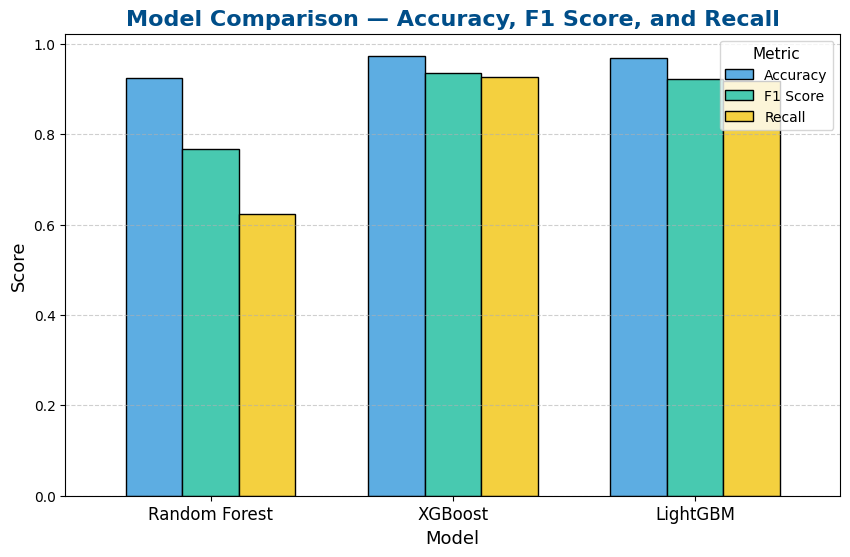

In [ ]:
metrics_to_plot = ['Accuracy', 'F1 Score', 'Recall']

fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = ['#5DADE2', '#48C9B0', '#F4D03F']

results_df.set_index("Model")[metrics_to_plot].plot(
    kind='bar',
    ax=ax,
    color=bar_colors,
    width=0.7,
    edgecolor="black"
)

plt.title("Model Comparison — Accuracy, F1 Score, and Recall", fontsize=16, weight='bold', color='#004E89')
plt.ylabel("Score", fontsize=13)
plt.xlabel("Model", fontsize=13)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title="Metric", fontsize=10, title_fontsize=11, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 8. Final Step: Probabilities & Conclusion

In this final step, we extract the probability (%) that each player will become a Future Star.  
This allows us to go beyond just classification (0/1).

In [ ]:
# Rebuild and fit pipeline for XGBoost (with preprocessing)
pipeline_xgb = Pipeline([
    ("preprocess", preprocessor),
    ("model", xgb_clf)
])

pipeline_xgb.fit(X_train, y_train)

# Get probabilities
y_proba = pipeline_xgb.predict_proba(X_test)[:, 1]
y_percent = (y_proba * 100).round(2)

# Get predictions with threshold = 0.8
y_pred = (y_proba >= 0.8).astype(int)

# Build results DataFrame
results = pd.DataFrame({
    "Player": target_df.loc[X_test.index, "Player"].values,
    "Predicted_Label": y_pred,
    "Future_Star_Probability": y_percent.astype(str) + "%"
}).sort_values("Future_Star_Probability", ascending=False)

print("Top 10 Players by Future Star Probability:")
print(results.head(10).to_string(index=False))

Top 10 Players by Future Star Probability:
           Player  Predicted_Label Future_Star_Probability
       Harry Kane                1                  99.92%
Ermedin Demirović                1                  99.92%
  Victor Boniface                1                  99.91%
      Désiré Doué                1                   99.9%
      Myron Boadu                1                  99.88%
    Kylian Mbappé                1                  99.88%
      Deniz Undav                1                  99.86%
   Gaëtan Laborde                1                  99.86%
        Dani Olmo                1                  99.86%
  Florian Tardieu                1                  99.85%


In [ ]:
# Show 10 players with the lowest probability
print("Lowest 10 Players by Future Star Probability:")
print(
    results.sort_values("Future_Star_Probability", ascending=True)
           .head(10)
           .to_string(index=False)
)

Lowest 10 Players by Future Star Probability:
               Player  Predicted_Label Future_Star_Probability
      Nicola Zalewski                0                   0.03%
           Javi López                0                   0.03%
          Fran Garcia                0                   0.04%
    Mikael Ellertsson                0                   0.05%
         Khalil Fayad                0                   0.05%
       Destiny Udogie                0                   0.05%
     Omari Hutchinson                0                   0.05%
          Merlin Röhl                0                   0.06%
           Saidou Sow                0                   0.06%
Cristian Cásseres Jr.                0                   0.06%
